In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# !pip install seaborn

# 1. Data Preparation

In [3]:
df_google_search_data = pd.read_csv(
    "google_search_data.csv"
)



df_product_mnf_list = pd.read_csv(
    "product_manufacturer_list.csv"
)

df_product_mnf_list = df_product_mnf_list[
    [
        "PRODUCT_ID","Vendor"
    ]
]



df_sales_data = pd.read_csv(
    "sales_data.csv"
)



df_social_media_data = pd.read_csv(
    "social_media_data.csv"
)


df_social_media_data.rename(
    columns={
        "Theme Id":"CLAIM_ID"
    },
    inplace=True
)


df_Theme_list = pd.read_csv(
    "Theme_list.csv"
)



df_Theme_product_list = pd.read_csv(
    "Theme_product_list.csv"
)

df_Theme_product_list

PRODUCT_ID  CLAIM_ID
0              26         8
1              29         8
2              48        81
3              50        81
4              74       227
...           ...       ...
91480        8158         0
91481       45183         0
91482       25690         0
91483       46085         0
91484       34907         0

[91485 rows x 2 columns]

#### a) Merge the required data sources

In [4]:
df_sales_data.rename(columns={"product_id":"PRODUCT_ID"}, inplace=True)
df_sales_data

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  \
0                     20160109           1              13927.0   
1                     20160109           3              10289.0   
2                     20160109           4                357.0   
3                     20160109           6              23113.0   
4                     20160109           7              23177.0   
...                        ...         ...                  ...   
4526177               20181027       47536                  8.0   
4526178               20181027       47539                391.0   
4526179               20181027       47543                105.0   
4526180               20181027       47544               3720.0   
4526181               20181027       47545               1729.0   

         sales_units_value  sales_lbs_value  
0                      934            18680  
1                     1592            28646  
2                       22              440  
3                     2027            81088  
4                     3231            58164  
...                    ...              ...  
4526177                  2                3  
4526178                 39               68  
4526179                 59               48  
4526180               1246             4361  
4526181               2016              378  

[4526182 rows x 5 columns]

In [5]:
# Merge 'sales_theme_data' dataset with 'Theme_product_list' dataset
df_sales_theme_data = pd.merge(
    df_sales_data,
    df_Theme_product_list, 
    how="inner",
    on="PRODUCT_ID"
)

df_sales_theme_data

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  \
0                     20160109           1              13927.0   
1                     20160123           1              12628.0   
2                     20160206           1              11379.0   
3                     20160130           1              11568.0   
4                     20160213           1              10959.0   
...                        ...         ...                  ...   
7767415               20191005       56817                699.0   
7767416               20191005       56818                486.0   
7767417               20191005       56924                 53.0   
7767418               20191005       57045                  6.0   
7767419               20191005       57081                  2.0   

         sales_units_value  sales_lbs_value  CLAIM_ID  
0                      934            18680         0  
1                      878            17564         0  
2                      810            16200         0  
3                      821            16424         0  
4                      784            15682         0  
...                    ...              ...       ...  
7767415                 37              129         0  
7767416                  7              158         0  
7767417                  3               16         8  
7767418                  1                7         0  
7767419                  1                0         0  

[7767420 rows x 6 columns]

In [6]:
# Merge 'google_search_data' dataset with 'Theme_product_list' dataset
df_google_search_data.rename(
    columns={
        "Claim_ID":"CLAIM_ID"
    },
    inplace=True
)

df_google_search_data



df_google_search_theme_data = pd.merge(
    df_google_search_data,
    df_Theme_product_list, 
    how="inner",
    on="CLAIM_ID"
)

df_google_search_theme_data

date platform  searchVolume  CLAIM_ID  week_number  year_new  \
0          01-01-2014   google          6613         8            1      2014   
1          01-01-2014   google          6613         8            1      2014   
2          01-01-2014   google          6613         8            1      2014   
3          01-01-2014   google          6613         8            1      2014   
4          01-01-2014   google          6613         8            1      2014   
...               ...      ...           ...       ...          ...       ...   
100858375  29-06-2019   google            41       433           26      2019   
100858376  29-06-2019   google            41       433           26      2019   
100858377  29-06-2019   google            41       433           26      2019   
100858378  29-06-2019   google            41       433           26      2019   
100858379  29-06-2019   google            41       433           26      2019   

           PRODUCT_ID  
0                  26  
1                  29  
2                  86  
3                  87  
4                 120  
...               ...  
100858375       18931  
100858376       18932  
100858377       26054  
100858378       26059  
100858379       26420  

[100858380 rows x 7 columns]

In [7]:
df_social_media_data

CLAIM_ID published_date  total_post
0          148.0     10-01-2015          76
1          148.0     10-10-2015          31
2          148.0     10-11-2015          65
3          148.0     10-12-2015          88
4          148.0     10/13/2015          85
...          ...            ...         ...
533385     876.0     09-05-2019        4658
533386     876.0     09-06-2019        3731
533387     876.0     09-07-2019        2336
533388     876.0     09-08-2019        1374
533389     876.0     09-09-2019        1442

[533390 rows x 3 columns]

In [8]:
# Merge 'product_manufacturer_list' dataset with 'Theme_product_list' dataset
df_product_mnf_theme_list = pd.merge(
    df_product_mnf_list,
    df_Theme_product_list,
    how="inner",
    on="PRODUCT_ID"
)

df_product_mnf_theme_list

PRODUCT_ID  Vendor  CLAIM_ID
0               1  Others         0
1               2  Others         0
2               3  Others         0
3               4  Others         0
4               5  Others         0
...           ...     ...       ...
91480       57314  Others        40
91481       57314  Others         8
91482       57315  Others         8
91483       57316  Others         8
91484       57317  Others         8

[91485 rows x 3 columns]

### After merging above datasets, we will use 4 datasets for further processing i.e.

### a) df_google_search_theme_data
### b) df_product_mnf_theme_list
### c) df_sales_theme_data
### d) df_social_media_data

#### b) Provide the list of themes available across all data sources

In [9]:
# List of themes in 'df_google_search_theme_data' dataset
df_google_search_theme_data["CLAIM_ID"].unique()

array([  8,  39,  40, 100, 151, 191, 192, 163, 152, 207, 430,  81, 142,
       437, 438,  65, 211, 187, 158,  75, 227, 228, 148, 120, 193, 384,
       393, 101, 125, 433])

In [10]:
# List of themes in 'df_product_mnf_theme_list' dataset
df_product_mnf_theme_list["CLAIM_ID"].unique()

array([  0,   8, 227, 158,  81,  40, 438, 430,  58, 432, 433, 224, 186,
        32, 187, 185, 222, 193, 220, 120, 125, 437, 145, 152, 151, 228,
        65,  39,  16, 287,  75,  73, 384, 142, 393,  15, 192, 147, 148,
       163, 207,  38, 101,  59, 178, 157, 191, 100, 211, 385, 171])

In [11]:
# List of themes in 'df_sales_theme_data' dataset
df_sales_theme_data["CLAIM_ID"].unique()

array([  0, 158, 227, 432, 186, 222, 185, 430, 187, 224, 220, 193, 438,
        32,  40,  58,   8,  81, 151,  75, 163, 147, 120, 207, 152, 228,
        39,  73, 433,  15, 437, 192, 287, 385, 125,  16, 178, 384, 145,
       100, 142, 101, 171, 393, 191,  38, 148, 211,  65])

In [12]:
# List of themes in 'df_social_media_data' dataset
df_social_media_data["CLAIM_ID"] = df_social_media_data["CLAIM_ID"].astype("Int64")
df_social_media_data["CLAIM_ID"].unique()

<IntegerArray>
[ 148,  543,  847,  999,  816,  747,  922,  754,  915,  683,
 ...
  727,  171,  508,  769,  949,  521,  145,  147, <NA>,  876]
Length: 194, dtype: Int64

#### c) Understand consumer preference(themes) available in each data source

In [13]:
df_google_search_theme_data_groupby_theme = df_google_search_theme_data.groupby(
    [
        "CLAIM_ID","year_new"
    ]
).agg(
    {
        "searchVolume":"mean",
        "PRODUCT_ID":"count",
        "platform":set
    }
).rename(
    columns={
        "PRODUCT_ID":"Total Products",
        "searchVolume":"Average SearchVolume",
        "platform":"Platforms Used"
    }
)

df_google_search_theme_data_groupby_theme

Average SearchVolume  Total Products  \
CLAIM_ID year_new                                         
8        2014               5931.939227         6753110   
         2015               6566.228022         6790420   
         2016               6691.167582         6790420   
         2017               5288.865229         6921005   
         2018               2386.129346        26825890   
...                                 ...             ...   
438      2015              12362.728022          548912   
         2016              11815.659341          548912   
         2017              10371.053908          559468   
         2018               4461.372881         1512524   
         2019               4295.411429         1319500   

                                     Platforms Used  
CLAIM_ID year_new                                    
8        2014                              {google}  
         2015                              {google}  
         2016                              {google}  
         2017                              {google}  
         2018      {walmart, amazon, google, chewy}  
...                                             ...  
438      2015                              {google}  
         2016                              {google}  
         2017                              {google}  
         2018      {walmart, amazon, google, chewy}  
         2019      {walmart, amazon, google, chewy}  

[157 rows x 3 columns]

In [14]:
df_product_mnf_theme_groupby_list = df_product_mnf_theme_list.groupby(
    "CLAIM_ID"
).agg(
    {
        "PRODUCT_ID":"count",
        "Vendor":set
    }
).rename(
    {
        "PRODUCT_ID":"Total Products",
        "Vendor":"Vendor_Set"
    }
)

df_product_mnf_theme_groupby_list

PRODUCT_ID                                        Vendor
CLAIM_ID                                                          
0              29152  {E, G, B, D, H, A, Private Label, Others, F}
8              18655        {B, D, H, A, Private Label, Others, F}
15               320                 {Others, Private Label, D, A}
16               295                                      {Others}
32              3426                       {B, D, H, A, Others, F}
38                22                                   {Others, A}
39               335                                {Others, B, A}
40              7537        {B, D, H, A, Private Label, Others, F}
58              2397        {B, D, H, A, Private Label, Others, F}
59                12                                      {Others}
65                 3                                      {Others}
73               381           {B, H, D, A, Private Label, Others}
75               467           {B, D, A, Private Label, Others, F}
81              1896           {B, H, A, Private Label, Others, F}
100              110                                      {Others}
101               11                                      {Others}
120             1362                 {Others, Private Label, F, A}
125              393                    {Others, Private Label, A}
142              116                                      {Others}
145               87                       {Others, Private Label}
147              139           {B, H, A, Private Label, Others, F}
148                1                                           {A}
151              800           {B, D, A, Private Label, Others, F}
152              100           {B, H, D, A, Private Label, Others}
157                1                                      {Others}
158              930        {B, D, H, A, Private Label, Others, F}
163              105                             {Others, B, F, A}
171                6                                      {Others}
178                6                    {Others, B, Private Label}
185             1855        {B, H, D, A, Private Label, Others, F}
186             3880        {B, D, H, A, Private Label, Others, F}
187             2381        {B, H, D, A, Private Label, Others, F}
191               35                                      {Others}
192               14                                      {Others}
193              121                                {Others, B, A}
207              154                    {Others, Private Label, H}
211                3                                      {Others}
220              356                          {B, H, A, Others, F}
222             1855        {B, H, D, A, Private Label, Others, F}
224             2381        {B, H, D, A, Private Label, Others, F}
227              960        {B, D, H, A, Private Label, Others, F}
228              138                                   {Others, A}
287               60                                   {Others, A}
384               20                                   {Others, B}
385               11                                      {Others}
393                2                                      {Others}
430              678        {B, H, D, A, Private Label, Others, F}
432             5512        {B, D, H, A, Private Label, Others, F}
433              286                       {B, D, H, A, Others, F}
437              210                          {B, H, A, Others, F}
438             1508        {B, H, D, A, Private Label, Others, F}

In [15]:
df_sales_theme_groupby_data = df_sales_theme_data.groupby(
    "CLAIM_ID"
).agg(
    {
        "PRODUCT_ID":"count",
        "sales_dollars_value":"mean",
        "sales_units_value":"mean",
        "sales_lbs_value":"mean"
    }).rename(
    columns={
        "PRODUCT_ID":"Total Products",
        "sales_dollars_value":"Average_Sales_Dollar_Value",
        "sales_units_value":"Average_Sales_Units_Value",
        "sales_lbs_value":"Average_Sales_LBS_Value"
    }
)

df_sales_theme_groupby_data

Total Products  Average_Sales_Dollar_Value  \
CLAIM_ID                                               
0                2045703                28727.111414   
8                1668808                11161.054421   
15                 35758                 8567.828654   
16                 26367                 1049.979406   
32                387999                32881.010170   
38                   150                  394.540000   
39                 24818                 9090.258844   
40                826406                17410.583999   
58                175912                 8330.841875   
65                    61                 2273.311475   
73                 25085                 3939.712258   
75                 42655                 6856.775032   
81                215635                17898.111030   
100                17795                41527.643439   
101                  956                 5537.665272   
120               129212                 6624.085952   
125                16617                 2828.757237   
142                 8208                 2057.372076   
145                 7016                 6985.035490   
147                11514                 7342.977332   
148                    3                   69.666667   
151                60132                 9816.783410   
152                 6117                 6683.775707   
158                73382                 4385.901052   
163                10967                18926.028631   
171                  827                 1683.214027   
178                  264                20522.238636   
185               146173                29103.276891   
186               338116                20724.565081   
187               218897                14333.155310   
191                  598                 2894.742475   
192                 1001                14687.166833   
193                 8539                 8845.241480   
207                 5038                 2173.236800   
211                  138                 4337.050725   
220                26954                14257.288121   
222               146173                29103.276891   
224               218897                14333.155310   
227                84542                28389.344042   
228                 4485                 1190.400446   
287                 4216                 2520.531784   
384                  726                  781.526171   
385                  824                 9839.838592   
393                  112                 1937.928571   
430                55961                42491.834778   
432               520679                15546.109459   
433                22113                 5769.593994   
437                12152                 8583.133311   
438               132719                21143.971956   

          Average_Sales_Units_Value  Average_Sales_LBS_Value  
CLAIM_ID                                                      
0                       9083.068438             29073.425602  
8                       1574.430334              3894.222360  
15                       479.801946              2411.719391  
16                       491.858687               213.656806  
32                      3585.624533             14105.832693  
38                        38.213333                18.033333  
39                       551.824925              4287.747079  
40                      1887.684228              6789.826641  
58                      1746.668635              2073.581620  
65                        93.213115               279.524590  
73                       792.932948              1290.816225  
75                      1926.404314              1567.972078  
81                      1520.868407              6920.445016  
100                     1026.242428             11293.641416  
101                      520.053347              1900.570084  
120                      322.450299              1528.695671  
125                

In [16]:
def change_date_format(x):
    print(x)
    if "/" in x:
        return x.replace("/","-")
    else:
        return x
        
s = "10/03/2014"
change_date_format(s)

df_social_media_data["published_date"] = df_social_media_data["published_date"].apply(change_date_format)
df_social_media_data

10/03/2014
10-01-2015
10-10-2015
10-11-2015
10-12-2015
10/13/2015
10/14/2015
10/15/2015
10/16/2015
10/17/2015
10/18/2015
10/19/2015
10-02-2015
10/20/2015
10/21/2015
10/22/2015
10/23/2015
10/24/2015
10/25/2015
10/26/2015
10/27/2015
10/28/2015
10/29/2015
10-03-2015
10/30/2015
10/31/2015
10-04-2015
10-05-2015
10-06-2015
10-07-2015
10-08-2015
10-09-2015
11-01-2015
11-10-2015
11-11-2015
11-12-2015
11/13/2015
11/14/2015
11/15/2015
11/16/2015
11/17/2015
11/18/2015
11/19/2015
11-02-2015
11/20/2015
11/21/2015
11/22/2015
11/23/2015
11/24/2015
11/25/2015
11/26/2015
11/27/2015
11/28/2015
11/29/2015
11-03-2015
11/30/2015
11-04-2015
11-05-2015
11-06-2015
11-07-2015
11-08-2015
11-09-2015
12-01-2015
12-10-2015
12-11-2015
12-12-2015
12/13/2015
12/14/2015
12/15/2015
12/16/2015
12/17/2015
12/18/2015
12/19/2015
12-02-2015
12/20/2015
12/21/2015
12/22/2015
12/23/2015
12/24/2015
12/25/2015
12/26/2015
12/27/2015
12/28/2015
12/29/2015
12-03-2015
12/30/2015
12/31/2015
12-04-2015
12-05-2015
12-06-2015
12-07-2015

11-06-2015
11-07-2015
11-08-2015
11-09-2015
12-01-2015
12-10-2015
12-11-2015
12-12-2015
12/13/2015
12/14/2015
12/15/2015
12/16/2015
12/17/2015
12/18/2015
12/19/2015
12-02-2015
12/20/2015
12/21/2015
12/22/2015
12/23/2015
12/24/2015
12/25/2015
12/26/2015
12/27/2015
12/28/2015
12/29/2015
12-03-2015
12/30/2015
12/31/2015
12-04-2015
12-05-2015
12-06-2015
12-07-2015
12-08-2015
12-09-2015
5/21/2015
5/22/2015
5/23/2015
5/24/2015
5/25/2015
5/26/2015
5/27/2015
5/28/2015
5/29/2015
5/30/2015
5/31/2015
06-01-2015
06-10-2015
06-11-2015
06-12-2015
6/13/2015
6/14/2015
6/15/2015
6/16/2015
6/17/2015
6/18/2015
6/19/2015
06-02-2015
6/20/2015
6/21/2015
6/22/2015
6/23/2015
6/24/2015
6/25/2015
6/26/2015
6/27/2015
6/28/2015
6/29/2015
06-03-2015
6/30/2015
06-04-2015
06-05-2015
06-06-2015
06-07-2015
06-08-2015
06-09-2015
07-01-2015
07-10-2015
07-11-2015
07-12-2015
7/13/2015
7/14/2015
7/15/2015
7/16/2015
7/17/2015
7/18/2015
7/19/2015
07-02-2015
7/20/2015
7/21/2015
7/22/2015
7/23/2015
7/24/2015
7/25/2015
7/26/201

2/27/2018
2/28/2018
02-03-2018
02-04-2018
02-05-2018
02-06-2018
02-07-2018
02-08-2018
02-09-2018
03-01-2018
03-10-2018
03-11-2018
03-12-2018
3/13/2018
3/14/2018
3/15/2018
3/16/2018
3/17/2018
3/18/2018
3/19/2018
03-02-2018
3/20/2018
3/21/2018
3/22/2018
3/23/2018
3/24/2018
3/25/2018
3/26/2018
3/27/2018
3/28/2018
3/29/2018
03-03-2018
3/30/2018
3/31/2018
03-04-2018
03-05-2018
03-06-2018
03-07-2018
03-08-2018
03-09-2018
04-01-2018
04-10-2018
04-11-2018
04-12-2018
4/13/2018
4/14/2018
4/15/2018
4/16/2018
4/17/2018
4/18/2018
4/19/2018
04-02-2018
4/20/2018
4/21/2018
4/22/2018
4/23/2018
4/24/2018
4/25/2018
4/26/2018
4/27/2018
4/28/2018
4/29/2018
04-03-2018
4/30/2018
04-04-2018
04-05-2018
04-06-2018
04-07-2018
04-08-2018
04-09-2018
05-01-2018
05-10-2018
05-11-2018
05-12-2018
5/13/2018
5/14/2018
5/15/2018
5/16/2018
5/17/2018
5/18/2018
5/19/2018
05-02-2018
5/20/2018
5/21/2018
5/22/2018
5/23/2018
5/24/2018
5/25/2018
5/26/2018
5/27/2018
5/28/2018
5/29/2018
05-03-2018
5/30/2018
5/31/2018
05-04-2018
05

11-01-2015
11-10-2015
11-11-2015
11-12-2015
11/13/2015
11/14/2015
11/15/2015
11/16/2015
11/17/2015
11/18/2015
11/19/2015
11-02-2015
11/20/2015
11/21/2015
11/22/2015
11/23/2015
11/24/2015
11/25/2015
11/26/2015
11/27/2015
11/28/2015
11/29/2015
11-03-2015
11/30/2015
11-04-2015
11-05-2015
11-06-2015
11-07-2015
11-08-2015
11-09-2015
12-01-2015
12-10-2015
12-11-2015
12-12-2015
12/13/2015
12/14/2015
12/15/2015
12/16/2015
12/17/2015
12/18/2015
12/19/2015
12-02-2015
12/20/2015
12/21/2015
12/22/2015
12/23/2015
12/24/2015
12/25/2015
12/26/2015
12/27/2015
12/28/2015
12/29/2015
12-03-2015
12/30/2015
12/31/2015
12-04-2015
12-05-2015
12-06-2015
12-07-2015
12-08-2015
12-09-2015
5/21/2015
5/22/2015
5/23/2015
5/24/2015
5/25/2015
5/26/2015
5/27/2015
5/28/2015
5/29/2015
5/30/2015
5/31/2015
06-01-2015
06-10-2015
06-11-2015
06-12-2015
6/13/2015
6/14/2015
6/15/2015
6/16/2015
6/17/2015
6/18/2015
6/19/2015
06-02-2015
6/20/2015
6/21/2015
6/22/2015
6/23/2015
6/24/2015
6/25/2015
6/26/2015
6/27/2015
6/28/2015
6/29

12/31/2018
12-04-2018
12-05-2018
12-06-2018
12-07-2018
12-08-2018
12-09-2018
02-01-2018
02-10-2018
02-11-2018
02-12-2018
2/13/2018
2/14/2018
2/15/2018
2/16/2018
2/17/2018
2/18/2018
2/19/2018
02-02-2018
2/20/2018
2/21/2018
2/22/2018
2/23/2018
2/24/2018
2/25/2018
2/26/2018
2/27/2018
2/28/2018
02-03-2018
02-04-2018
02-05-2018
02-06-2018
02-07-2018
02-08-2018
02-09-2018
03-01-2018
03-10-2018
03-11-2018
03-12-2018
3/13/2018
3/14/2018
3/15/2018
3/16/2018
3/17/2018
3/18/2018
3/19/2018
03-02-2018
3/20/2018
3/21/2018
3/22/2018
3/23/2018
3/24/2018
3/25/2018
3/26/2018
3/27/2018
3/28/2018
3/29/2018
03-03-2018
3/30/2018
3/31/2018
03-04-2018
03-05-2018
03-06-2018
03-07-2018
03-08-2018
03-09-2018
04-01-2018
04-10-2018
04-11-2018
04-12-2018
4/13/2018
4/14/2018
4/15/2018
4/16/2018
4/17/2018
4/18/2018
4/19/2018
04-02-2018
4/20/2018
4/21/2018
4/22/2018
4/23/2018
4/24/2018
4/25/2018
4/26/2018
4/27/2018
4/28/2018
4/29/2018
04-03-2018
4/30/2018
04-04-2018
04-05-2018
04-06-2018
04-07-2018
04-08-2018
04-09-20

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
df_social_media_data["published_date"] = pd.to_datetime(
    df_social_media_data[
        "published_date"
    ]
)

df_social_media_data["Published_Year"] = pd.DatetimeIndex(
    df_social_media_data[
        "published_date"
    ]
).year


df_theme_social_media_groupby_data = df_social_media_data.groupby(
    [
        "CLAIM_ID",
        "Published_Year"
    ]
)[
    "total_post"
].mean()

df_theme_social_media_groupby_data

CLAIM_ID  Published_Year
8         2015              219.177778
          2016              249.297814
          2017              329.901370
          2018              460.295890
          2019              351.720395
                               ...    
999       2015               18.768889
          2016               23.931694
          2017               34.857988
          2018               57.331507
          2019               45.634868
Name: total_post, Length: 965, dtype: float64

#### d) Provide a report for data sufficiency, sparsity and anomalies in each data source

###### Check for Sparsity

In [18]:
# Check the number of records in 'df_google_search_theme_data' with 'searchVolume' = 0 
df_google_search_theme_data.loc[df_google_search_theme_data["searchVolume"] == 0].size

0

In [19]:
print(str(round(
    (
        df_product_mnf_theme_list.loc[
            df_product_mnf_theme_list[
                "CLAIM_ID"
            ] == 0].shape[0]
        /
        df_product_mnf_theme_list.shape[0]
    )*100,
    2
)) + "%")

31.87%


In [20]:
df_sales_theme_data

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  \
0                     20160109           1              13927.0   
1                     20160123           1              12628.0   
2                     20160206           1              11379.0   
3                     20160130           1              11568.0   
4                     20160213           1              10959.0   
...                        ...         ...                  ...   
7767415               20191005       56817                699.0   
7767416               20191005       56818                486.0   
7767417               20191005       56924                 53.0   
7767418               20191005       57045                  6.0   
7767419               20191005       57081                  2.0   

         sales_units_value  sales_lbs_value  CLAIM_ID  
0                      934            18680         0  
1                      878            17564         0  
2                      810            16200         0  
3                      821            16424         0  
4                      784            15682         0  
...                    ...              ...       ...  
7767415                 37              129         0  
7767416                  7              158         0  
7767417                  3               16         8  
7767418                  1                7         0  
7767419                  1                0         0  

[7767420 rows x 6 columns]

In [21]:
# Check the percentage of records in 'df_sales_theme_data' dataset with 'sales_dollars_value' as 0 
print(
    str(round(
        (
            df_sales_theme_data.loc[
                df_sales_theme_data[
                    "sales_dollars_value"
                ] 
                == 0
            ].shape[0]
            /
            df_sales_theme_data.shape[0]
        )*100,
        2
    ))
+ "%")

0.33%


In [22]:
# Check the percentage of records in 'df_sales_theme_data' dataset with 'sales_units_value' as 0
print(str(round(
    (
        df_sales_theme_data.loc[
            df_sales_theme_data[
                "sales_units_value"
            ] 
            == 0
        ].shape[0]
        /
        df_sales_theme_data.shape[0]
    )*100,
    2
)) + "%")

0.0%


In [23]:
# Check the percentage of records in 'df_sales_theme_data' dataset with 'sales_lbs_value' as 0
print(str(round(
    (
        df_sales_theme_data.loc[
            df_sales_theme_data[
                "sales_lbs_value"
            ] 
            == 0
        ].shape[0]
        /
        df_sales_theme_data.shape[0]
    )*100,
    2
)) + "%")

0.86%


In [24]:
# Check the percentage of records in 'df_sales_theme_data' dataset with 'CLAIM_ID' as 0
print(str(round(
    (
        df_sales_theme_data.loc[
            df_sales_theme_data[
                "CLAIM_ID"
            ] 
            == 0
        ].shape[0]
        /
        df_sales_theme_data.shape[0]
    )*100,
    2
)) + "%")

26.34%


In [25]:
# Check the percentage of records in 'df_social_media_data' dataset with 'total_post' as 0
print(str(round(
    (
        df_social_media_data.loc[
            df_social_media_data[
                "total_post"
            ] 
            == 
            0].shape[0]
        /
        df_social_media_data.shape[0]
    )*100,
    2
)) + "%")

16.38%


###### Check for outliers in the datasets

In [26]:
# Get 25th percentile for 'searchVolume' column in 'df_google_search_theme_data' dataset
Q1 = df_google_search_theme_data[
    "searchVolume"
].quantile(0.25)

# Get 75th percentile for 'searchVolume' column in 'df_google_search_theme_data' dataset
Q3 = df_google_search_theme_data[
    "searchVolume"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'searchVolume' column in 'df_google_search_theme_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'searchVolume' column in 'df_google_search_theme_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'searchVolume' column in 'df_google_search_theme_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_google_search_theme_data' dataset with outliers in 'searchVolume' column
df_google_search_theme_data_outliers = df_google_search_theme_data.loc[
    (
        df_google_search_theme_data[
            "searchVolume"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_google_search_theme_data[
            "searchVolume"
        ]
        >
        upper_limit
    )
]

In [27]:
# Check the percentage of outliers in 'searchVolume' column of 'df_google_search_theme_data' dataset
print(str(round(
    (
        df_google_search_theme_data_outliers.shape[0]
        /
        df_google_search_theme_data.shape[0]
    )
    *
    100,
    2
)) + "%")

1.54%


<AxesSubplot:>

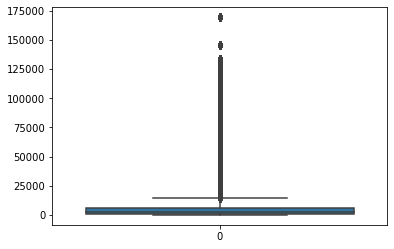

In [28]:
# Boxplot of 'searchVolume' column of 'df_google_search_theme_data' dataset
sns.boxplot(
    data = 
    df_google_search_theme_data[
    "searchVolume"
    ],
    orient = "v"
)

In [29]:
# df_sales_theme_data

In [30]:
# Get 25th percentile for 'sales_dollars_value' column in 'df_sales_theme_data' dataset
Q1 = df_sales_theme_data[
    "sales_dollars_value"
].quantile(0.25)

# Get 75th percentile for 'sales_dollars_value' column in 'df_sales_theme_data' dataset
Q3 = df_sales_theme_data[
    "sales_dollars_value"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'sales_dollars_value' column in 'df_sales_theme_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'sales_dollars_value' column in 'df_sales_theme_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'sales_dollars_value' column in 'df_sales_theme_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_sales_theme_data' dataset with outliers in 'sales_dollars_value' column
df_sales_dollars_theme_data_outliers = df_sales_theme_data.loc[
    (
        df_sales_theme_data[
            "sales_dollars_value"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_sales_theme_data[
            "sales_dollars_value"
        ]
        >
        upper_limit
    )
]


df_sales_dollars_theme_data_outliers

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  \
368                   20190427           3              45496.0   
573                   20160123           6              35417.0   
578                   20160227           6              31299.0   
583                   20160402           6              32884.0   
586                   20160423           6              36090.0   
...                        ...         ...                  ...   
7766591               20191005       57293              56714.0   
7767249               20191005       55888              42231.0   
7767311               20190928       38585              64337.0   
7767312               20191005       38585             150962.0   
7767372               20191005       50867              70543.0   

         sales_units_value  sales_lbs_value  CLAIM_ID  
368                   4011            72211         0  
573                   3142           125688         0  
578                   2642           105684         0  
583                   2989           119550         0  
586                   3075           123007         0  
...                    ...              ...       ...  
7766591               7677             5757         8  
7767249               3999             7999       158  
7767311               3395           108640       227  
7767312               7958           254656       227  
7767372               7069            35345       158  

[1009776 rows x 6 columns]

In [31]:
# Check the percentage of outliers in 'sales_dollars_value' column of 'df_sales_theme_data' dataset
print(str(round(
    (
        df_sales_dollars_theme_data_outliers.shape[0]
        /
        df_sales_theme_data.shape[0]
    )
    *
    100,
    2
)) + "%")

13.0%


<AxesSubplot:>

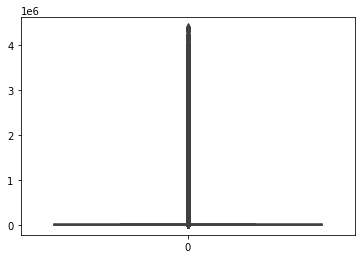

In [32]:
# Boxplot of 'sales_dollars_value' column of 'df_sales_theme_data' dataset
sns.boxplot(
    data = df_sales_theme_data[
        "sales_dollars_value"
    ],
    orient="v"
)

In [33]:
# Get 25th percentile for 'sales_units_value' column in 'df_sales_theme_data' dataset
Q1 = df_sales_theme_data[
    "sales_units_value"
].quantile(0.25)

# Get 75th percentile for 'sales_units_value' column in 'df_sales_theme_data' dataset
Q3 = df_sales_theme_data[
    "sales_units_value"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'sales_units_value' column in 'df_sales_theme_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'sales_units_value' column in 'df_sales_theme_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'sales_units_value' column in 'df_sales_theme_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_sales_theme_data' dataset with outliers in 'sales_units_value' column
df_sales_units_theme_data_outliers = df_sales_theme_data.loc[
    (
        df_sales_theme_data[
            "sales_units_value"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_sales_theme_data[
            "sales_units_value"
        ]
        >
        upper_limit
    )
]

df_sales_units_theme_data_outliers

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  \
368                   20190427           3              45496.0   
771                   20160130           7              22923.0   
772                   20160213           7              25235.0   
776                   20160312           7              30600.0   
777                   20160319           7              31226.0   
...                        ...         ...                  ...   
7766623               20191005       57297              27146.0   
7767249               20191005       55888              42231.0   
7767311               20190928       38585              64337.0   
7767312               20191005       38585             150962.0   
7767372               20191005       50867              70543.0   

         sales_units_value  sales_lbs_value  CLAIM_ID  
368                   4011            72211         0  
771                   3496            62921         0  
772                   3475            62541         0  
776                   3787            68161         0  
777                   4113            74036         0  
...                    ...              ...       ...  
7766623               9296            32536         0  
7767249               3999             7999       158  
7767311               3395           108640       227  
7767312               7958           254656       227  
7767372               7069            35345       158  

[1079359 rows x 6 columns]

In [34]:
# Check the percentage of outliers in 'sales_units_value' column of 'df_sales_theme_data' dataset
print(str(round(
    (
        df_sales_units_theme_data_outliers.shape[0]
        /
        df_sales_theme_data.shape[0]
    )
    *
    100,
    2
)) + "%")

13.9%


<AxesSubplot:>

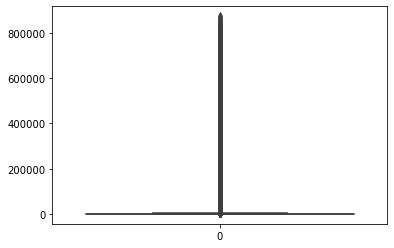

In [35]:
# Boxplot of 'sales_units_value' column of 'df_sales_theme_data' dataset
sns.boxplot(
    data = df_sales_theme_data[
        "sales_units_value"
    ],
    orient="v"
)

In [36]:
# Get 25th percentile for 'sales_lbs_value' column in 'df_sales_theme_data' dataset
Q1 = df_sales_theme_data[
    "sales_lbs_value"
].quantile(0.25)

# Get 75th percentile for 'sales_lbs_value' column in 'df_sales_theme_data' dataset
Q3 = df_sales_theme_data[
    "sales_lbs_value"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'sales_lbs_value' column in 'df_sales_theme_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'sales_lbs_value' column in 'df_sales_theme_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'sales_lbs_value' column in 'df_sales_theme_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_sales_theme_data' dataset with outliers in 'sales_lbs_value' column
df_sales_lbs_theme_data_outliers = df_sales_theme_data.loc[
    (
        df_sales_theme_data[
            "sales_units_value"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_sales_theme_data[
            "sales_units_value"
        ]
        >
        upper_limit
    )
]

df_sales_lbs_theme_data_outliers

system_calendar_key_N  PRODUCT_ID  sales_dollars_value  \
1160                  20160109           9             304750.0   
1161                  20160123           9             305526.0   
1162                  20160206           9             270137.0   
1163                  20160130           9             299819.0   
1164                  20160213           9             291778.0   
...                        ...         ...                  ...   
7765899               20191005       57172              65159.0   
7766475               20190831       57274               5645.0   
7766592               20190817       57294               8726.0   
7766593               20190824       57294               6497.0   
7766599               20191005       57294               5695.0   

         sales_units_value  sales_lbs_value  CLAIM_ID  
1160                 19619           784769         0  
1161                 19246           769852         0  
1162                 17801           712023         0  
1163                 19240           769609         0  
1164                 22763           910506         0  
...                    ...              ...       ...  
7765899              11337            14171         0  
7766475               9414             1765         0  
7766592              14465             3164         0  
7766593              11046             2416         0  
7766599               9618             2104         0  

[495489 rows x 6 columns]

In [37]:
# Check the percentage of outliers in 'sales_lbs_value' column of 'df_sales_theme_data' dataset
print(str(round(
    (
        df_sales_lbs_theme_data_outliers.shape[0]
        /
        df_sales_theme_data.shape[0]
    )
    *
    100,
    2
)) + "%")

6.38%


<AxesSubplot:>

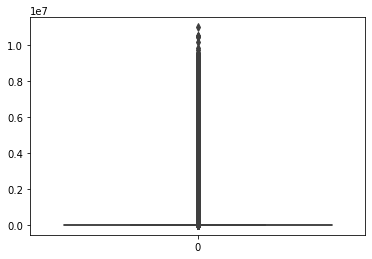

In [38]:
# Boxplot of 'sales_lbs_value' column of 'df_sales_theme_data' dataset
sns.boxplot(
    data = df_sales_theme_data[
        "sales_lbs_value"
    ],
    orient="v"
)

In [39]:
# Get 25th percentile for 'total_post' column in 'df_social_media_data' dataset
Q1 = df_social_media_data[
    "total_post"
].quantile(0.25)

# Get 75th percentile for 'total_post' column in 'df_social_media_data' dataset
Q3 = df_social_media_data[
    "total_post"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'total_post' column in 'df_social_media_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'total_post' column in 'df_social_media_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'total_post' column in 'df_social_media_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_social_media_data' dataset with outliers in 'total_post' column
df_social_media_data_outliers = df_social_media_data.loc[
    (
        df_social_media_data[
            "total_post"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_social_media_data[
            "total_post"
        ]
        >
        upper_limit
    )
]

df_social_media_data_outliers

CLAIM_ID published_date  total_post  Published_Year
1612         543     2015-10-22        1082            2015
1857         543     2016-10-12        1300            2016
1866         543     2016-10-20         859            2016
1872         543     2016-10-26        1151            2016
1873         543     2016-10-27         884            2016
...          ...            ...         ...             ...
533385       876     2019-09-05        4658            2019
533386       876     2019-09-06        3731            2019
533387       876     2019-09-07        2336            2019
533388       876     2019-09-08        1374            2019
533389       876     2019-09-09        1442            2019

[92918 rows x 4 columns]

In [40]:
# Check the percentage of outliers in 'total_post' column of 'df_social_media_data' dataset
print(str(round(
    (
        df_social_media_data_outliers.shape[0]
        /
        df_social_media_data.shape[0]
    )
    *
    100,
    2
)) + "%")

17.42%


<AxesSubplot:>

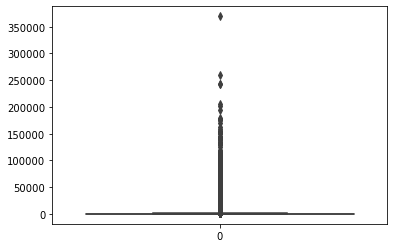

In [41]:
# Boxplot of 'total_post' column of 'df_social_media_data' dataset
sns.boxplot(
    data = df_social_media_data[
        "total_post"
    ],
    orient="v"
)

# EDA

In [42]:
# a) df_google_search_theme_data
# b) df_product_mnf_theme_list
# c) df_sales_theme_data
# d) df_social_media_data

from typing import Any
import matplotlib.pyplot as plt

In [43]:
def null_value_checker(data) -> pd.DataFrame:
    return data.isna().sum()

def null_value_percentage(data) -> Any:
    return data.isna().sum() / len(data)
    
def data_describe(data) -> pd.DataFrame:
    return data.describe()

def data_corr(data) -> Any:
    return data.corr()

In [44]:
# a) df_google_search_theme_data
print(null_value_checker(df_google_search_theme_data))
print(null_value_percentage(df_google_search_theme_data))
print(data_describe(df_google_search_theme_data))
print(data_corr(df_google_search_theme_data))

date            0
platform        0
searchVolume    0
CLAIM_ID        0
week_number     0
year_new        0
PRODUCT_ID      0
dtype: int64
date            0.0
platform        0.0
searchVolume    0.0
CLAIM_ID        0.0
week_number     0.0
year_new        0.0
PRODUCT_ID      0.0
dtype: float64
       searchVolume      CLAIM_ID   week_number      year_new    PRODUCT_ID
count  1.008584e+08  1.008584e+08  1.008584e+08  1.008584e+08  1.008584e+08
mean   3.812911e+03  6.479668e+01  2.491606e+01  2.017237e+03  2.725465e+04
std    4.710235e+03  1.163391e+02  1.446668e+01  1.642281e+00  1.495465e+04
min    1.000000e+00  8.000000e+00  1.000000e+00  2.014000e+03  2.400000e+01
25%    5.400000e+02  8.000000e+00  1.200000e+01  2.016000e+03  1.654400e+04
50%    2.431000e+03  8.000000e+00  2.500000e+01  2.018000e+03  2.742300e+04
75%    6.144000e+03  7.500000e+01  3.700000e+01  2.019000e+03  3.833000e+04
max    1.695430e+05  4.380000e+02  5.300000e+01  2.019000e+03  5.731700e+04
              searchVo

In [45]:
# b) df_product_mnf_theme_list
print(null_value_checker(df_product_mnf_theme_list))
print(null_value_percentage(df_product_mnf_theme_list))
print(data_describe(df_product_mnf_theme_list))
print(data_corr(df_product_mnf_theme_list))

PRODUCT_ID    0
Vendor        0
CLAIM_ID      0
dtype: int64
PRODUCT_ID    0.0
Vendor        0.0
CLAIM_ID      0.0
dtype: float64
         PRODUCT_ID      CLAIM_ID
count  91485.000000  91485.000000
mean   26592.860983     86.830847
std    15793.924430    130.570486
min        1.000000      0.000000
25%    12908.000000      0.000000
50%    26074.000000      8.000000
75%    39238.000000    158.000000
max    57317.000000    438.000000
            PRODUCT_ID  CLAIM_ID
PRODUCT_ID    1.000000 -0.192681
CLAIM_ID     -0.192681  1.000000


In [46]:
# c) df_sales_theme_data
print(null_value_checker(df_sales_theme_data))
print(null_value_percentage(df_sales_theme_data))
print(data_describe(df_sales_theme_data))
print(data_corr(df_sales_theme_data))

system_calendar_key_N    0
PRODUCT_ID               0
sales_dollars_value      0
sales_units_value        0
sales_lbs_value          0
CLAIM_ID                 0
dtype: int64
system_calendar_key_N    0.0
PRODUCT_ID               0.0
sales_dollars_value      0.0
sales_units_value        0.0
sales_lbs_value          0.0
CLAIM_ID                 0.0
dtype: float64
       system_calendar_key_N    PRODUCT_ID  sales_dollars_value  \
count           7.767420e+06  7.767420e+06         7.767420e+06   
mean            2.017536e+07  2.719737e+04         1.956811e+04   
std             1.071372e+04  1.440538e+04         6.762102e+04   
min             2.016011e+07  1.000000e+00         0.000000e+00   
25%             2.017012e+07  1.446500e+04         6.780000e+02   
50%             2.017123e+07  2.721600e+04         3.097000e+03   
75%             2.018112e+07  3.905600e+04         1.253800e+04   
max             2.019100e+07  5.731700e+04         4.395964e+06   

       sales_units_value  sales_

In [47]:
# d) df_social_media_data
print(null_value_checker(df_social_media_data))
print(null_value_percentage(df_social_media_data))
print(data_describe(df_social_media_data))
print(data_corr(df_social_media_data))

CLAIM_ID          218511
published_date         0
total_post             0
Published_Year         0
dtype: int64
CLAIM_ID          0.409665
published_date    0.000000
total_post        0.000000
Published_Year    0.000000
dtype: float64
            CLAIM_ID     total_post  Published_Year
count  314879.000000  533390.000000   533390.000000
mean      618.714049    1054.344890     2017.097133
std       290.145829    4459.377626        1.323617
min         8.000000       0.000000     2015.000000
25%       440.000000       3.000000     2016.000000
50%       677.000000      35.000000     2017.000000
75%       870.000000     343.000000     2018.000000
max       999.000000  369528.000000     2019.000000
                CLAIM_ID  total_post  Published_Year
CLAIM_ID        1.000000    0.025869       -0.000069
total_post      0.025869    1.000000        0.026555
Published_Year -0.000069    0.026555        1.000000


# ●	Understand the overall market share of our client

In [49]:
data_merge_sales_mnf = df_product_mnf_theme_list.merge(df_sales_theme_data, how='inner', on='PRODUCT_ID')

In [50]:
data = data_merge_sales_mnf[['PRODUCT_ID', 'sales_dollars_value', 'Vendor']]

In [51]:
data_pivot = pd.pivot_table(data=data, index='PRODUCT_ID', values='sales_dollars_value', columns='Vendor')

In [52]:
data_pivot[data_pivot['A'] > 0]

Vendor                  A   B   D   E   F   G   H  Others  Private Label
PRODUCT_ID                                                              
578             23.000000 NaN NaN NaN NaN NaN NaN     NaN            NaN
587         128613.193878 NaN NaN NaN NaN NaN NaN     NaN            NaN
589          15250.739796 NaN NaN NaN NaN NaN NaN     NaN            NaN
590            169.736842 NaN NaN NaN NaN NaN NaN     NaN            NaN
591              1.000000 NaN NaN NaN NaN NaN NaN     NaN            NaN
...                   ...  ..  ..  ..  ..  ..  ..     ...            ...
56583         2208.750000 NaN NaN NaN NaN NaN NaN     NaN            NaN
56592          649.000000 NaN NaN NaN NaN NaN NaN     NaN            NaN
56594            1.000000 NaN NaN NaN NaN NaN NaN     NaN            NaN
56803           42.000000 NaN NaN NaN NaN NaN NaN     NaN            NaN
56804         2134.500000 NaN NaN NaN NaN NaN NaN     NaN            NaN

[4331 rows x 9 columns]

In [53]:
columns = df_product_mnf_theme_list['Vendor'].unique().tolist()

In [54]:
sales_means = {}

for column in columns:
    sales_means[column] = round(data_pivot[column].sum(), 2)

In [55]:
sorted(sales_means.items(), key=lambda x:x[1], reverse=True) #Our Sales Very Good

[('A', 179660272.08),
 ('Others', 115568754.39),
 ('B', 88122444.32),
 ('Private Label', 73391411.39),
 ('D', 70345800.83),
 ('F', 28682211.33),
 ('H', 13368301.83),
 ('G', 11880098.25),
 ('E', 10985680.23)]

In [56]:
our_market_share = round((sales_means['A'] / sum(list(sales_means.values()))) * 100, 2)
print(f"The market share of our client is {our_market_share}%")

The market share of our client is 30.35%


# ●	Find the potential competitors for our client in each theme

In [57]:
# data_merge_sales_mnf

In [58]:
data_2 = data_merge_sales_mnf[['PRODUCT_ID', 'sales_dollars_value', 'Vendor', 'CLAIM_ID_x']]

In [59]:
data_2

PRODUCT_ID  sales_dollars_value  Vendor  CLAIM_ID_x
0                  1              13927.0  Others           0
1                  1              12628.0  Others           0
2                  1              11379.0  Others           0
3                  1              11568.0  Others           0
4                  1              10959.0  Others           0
...              ...                  ...     ...         ...
21960073       57317                727.0  Others           8
21960074       57317               1348.0  Others           8
21960075       57317               1036.0  Others           8
21960076       57317               1442.0  Others           8
21960077       57317                865.0  Others           8

[21960078 rows x 4 columns]

In [61]:
data_pivot = pd.pivot_table(data=data_2, index='PRODUCT_ID', 
                            values='sales_dollars_value', 
                            columns=['Vendor', 'CLAIM_ID_x'])

In [62]:
data_pivot

Vendor       A                                      ... Private Label          \
CLAIM_ID_x 0   8   15  32  39  40  58  73  75  81   ...           185 186 187   
PRODUCT_ID                                          ...                         
1          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
2          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
3          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
4          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
5          NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...           ...  ..  ..   
57313      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
57314      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
57315      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
57316      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   
57317      NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...           NaN NaN NaN   

Vendor                                  
CLAIM_ID_x 207 222 224 227 430 432 438  
PRODUCT_ID                              
1          NaN NaN NaN NaN NaN NaN NaN  
2          NaN NaN NaN NaN NaN NaN NaN  
3          NaN NaN NaN NaN NaN NaN NaN  
4          NaN NaN NaN NaN NaN NaN NaN  
5          NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
57313      NaN NaN NaN NaN NaN NaN NaN  
57314      NaN NaN NaN NaN NaN NaN NaN  
57315      NaN NaN NaN NaN NaN NaN NaN  
57316      NaN NaN NaN NaN NaN NaN NaN  
57317      NaN NaN NaN NaN NaN NaN NaN  

[42616 rows x 197 columns]

In [63]:

def plot_on_vendors(column):
    data_pivot[column].sum().sort_values(axis=0, ascending=False).plot.bar()
    plt.show()

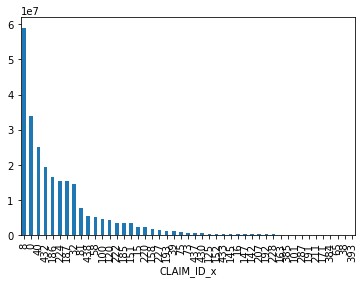

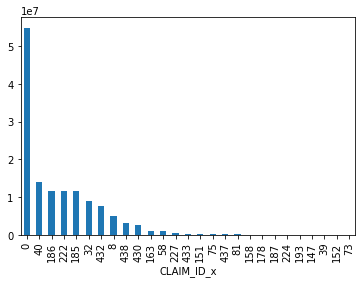

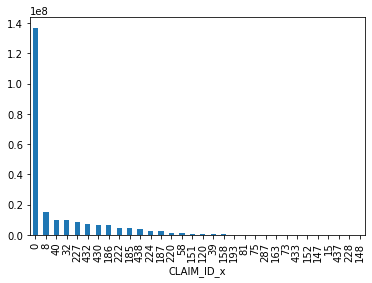

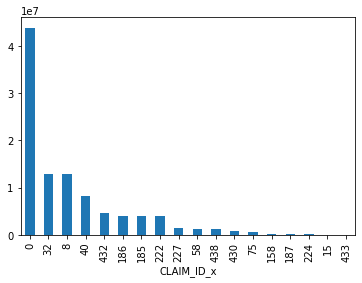

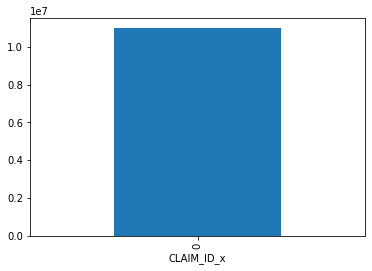

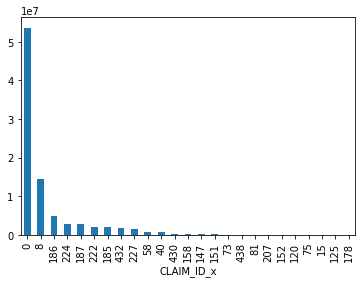

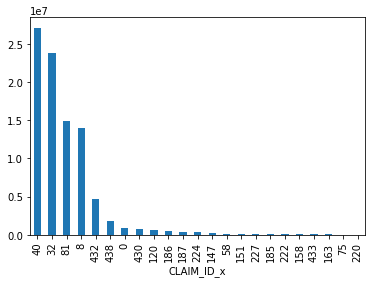

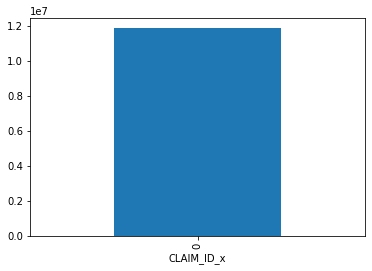

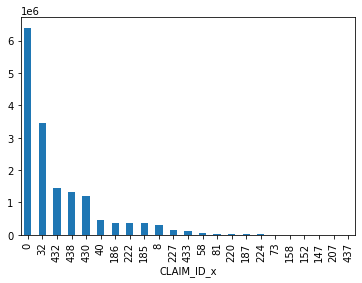

In [64]:
columns = df_product_mnf_theme_list['Vendor'].unique().tolist()
for column in columns:
    plot_on_vendors(column)

In [65]:
columns

['Others', 'B', 'A', 'D', 'E', 'Private Label', 'F', 'G', 'H']

In [66]:
def print_values_on_vendors(column):
    print(f"The Vendor is {column}")
    print(round(data_pivot[column].sum().sort_values(axis=0, ascending=False)))
    print("\n")
    print("\n")    

In [67]:
columns = df_product_mnf_theme_list['Vendor'].unique().tolist()
for column in columns:
    print_values_on_vendors(column)

The Vendor is Others
CLAIM_ID_x
8      59057364.0
0      33888531.0
40     25157230.0
432    19274703.0
186    16553209.0
224    15317128.0
187    15317128.0
32     14492402.0
81      7735434.0
438     5493260.0
58      5194752.0
100     4397560.0
120     4131391.0
222     3394990.0
185     3394990.0
151     3389438.0
15      2204791.0
220     2158908.0
158     1610609.0
227     1354472.0
193     1143898.0
39      1116177.0
75       907374.0
73       534722.0
437      471151.0
430      438841.0
125      333457.0
152      324366.0
433      323381.0
145      297568.0
16       197388.0
147      161050.0
142      125607.0
207      122412.0
192       87272.0
228       78769.0
163       61231.0
385       46378.0
101       32596.0
287       17717.0
191       16695.0
211        8858.0
171        7715.0
384        6407.0
65         2273.0
38         2041.0
393        1938.0
dtype: float64




The Vendor is B
CLAIM_ID_x
0      54877922.0
40     14040578.0
186    11679046.0
222    11661999.0
185 

# ●	Is there a Trend/Seasonality across themes

In [68]:
data_merge_sales_mnf['system_calendar_key_N'] = pd.to_datetime(data_merge_sales_mnf['system_calendar_key_N'], format='%Y%m%d')

In [69]:
data_merge_sales_mnf

PRODUCT_ID  Vendor  CLAIM_ID_x system_calendar_key_N  \
0                  1  Others           0            2016-01-09   
1                  1  Others           0            2016-01-23   
2                  1  Others           0            2016-02-06   
3                  1  Others           0            2016-01-30   
4                  1  Others           0            2016-02-13   
...              ...     ...         ...                   ...   
21960073       57317  Others           8            2019-09-07   
21960074       57317  Others           8            2019-09-14   
21960075       57317  Others           8            2019-09-21   
21960076       57317  Others           8            2019-09-28   
21960077       57317  Others           8            2019-10-05   

          sales_dollars_value  sales_units_value  sales_lbs_value  CLAIM_ID_y  
0                     13927.0                934            18680           0  
1                     12628.0                878            17564           0  
2                     11379.0                810            16200           0  
3                     11568.0                821            16424           0  
4                     10959.0                784            15682           0  
...                       ...                ...              ...         ...  
21960073                727.0                266              100           8  
21960074               1348.0                488              183           8  
21960075               1036.0                366              137           8  
21960076               1442.0                513              193           8  
21960077                865.0                316              118           8  

[21960078 rows x 8 columns]

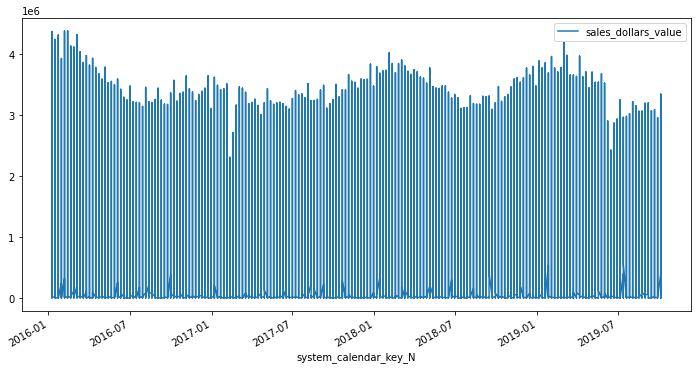

In [80]:
data_a = data_merge_sales_mnf[data_merge_sales_mnf['Vendor'] == 'A']
ax = data_a.plot(x='system_calendar_key_N', y='sales_dollars_value', figsize=(12,6))
plt.show()

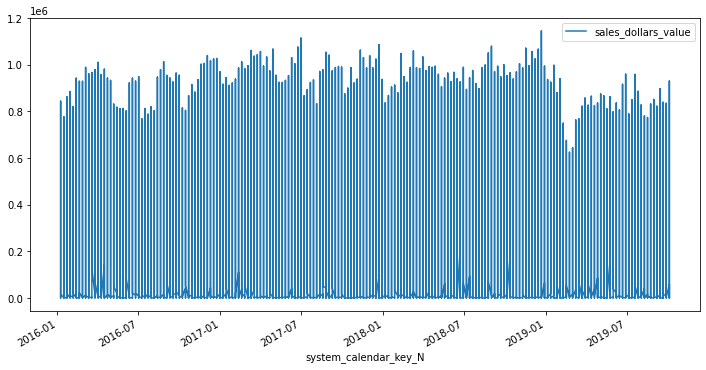

In [83]:
#others
data_others = data_merge_sales_mnf[data_merge_sales_mnf['Vendor'] == 'Others']
ax = data_others.plot(x='system_calendar_key_N', y='sales_dollars_value', figsize=(12,6))
plt.show()

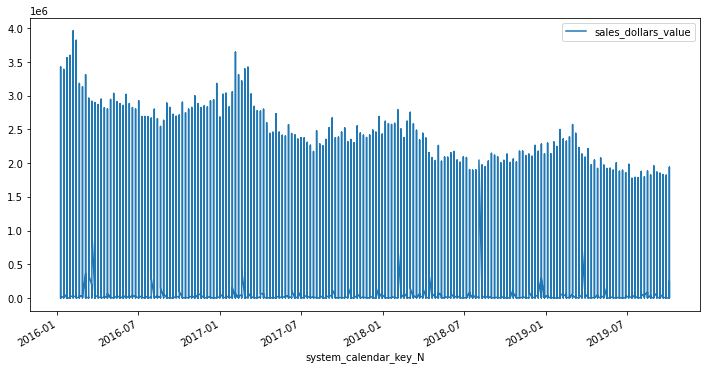

In [84]:
data_others = data_merge_sales_mnf[data_merge_sales_mnf['Vendor'] == 'B']
ax = data_others.plot(x='system_calendar_key_N', y='sales_dollars_value', figsize=(12,6))
plt.show()

In [85]:
data_merge_sales_mnf['CLAIM_ID_x'].unique()

array([  0,   8, 227, 158,  81,  40, 438,  58, 120, 432,  16, 287,  39,
        75, 187, 224, 186, 151, 193, 433,  32, 152, 220, 222, 430, 185,
        15, 437, 192, 142,  73, 228, 147, 148, 125, 163, 101, 207, 178,
        38, 191, 100, 145, 384, 393, 211,  65, 385, 171])

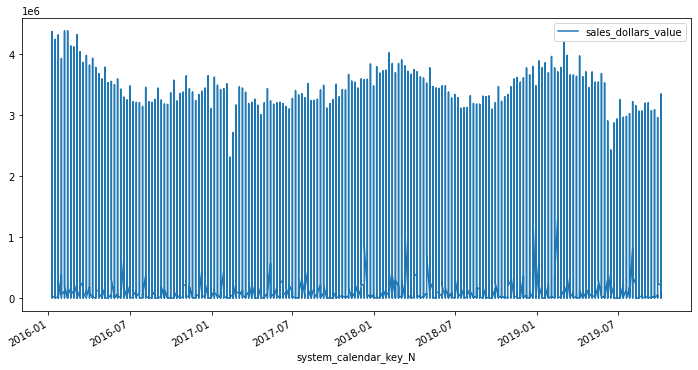

In [89]:
data_a_c = data_merge_sales_mnf[(data_merge_sales_mnf['Vendor'] == 'A') & (data_merge_sales_mnf['CLAIM_ID_x'] == 0)]
ax = data_a_c.plot(x='system_calendar_key_N', y='sales_dollars_value', figsize=(12,6))

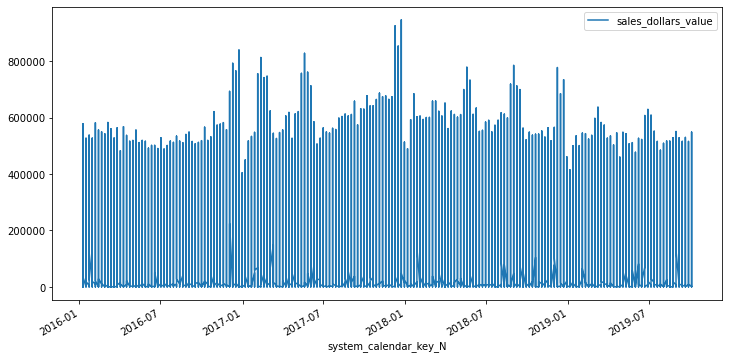

In [90]:
data_a_c = data_merge_sales_mnf[(data_merge_sales_mnf['Vendor'] == 'A') & (data_merge_sales_mnf['CLAIM_ID_x'] == 8)]
ax = data_a_c.plot(x='system_calendar_key_N', y='sales_dollars_value', figsize=(12,6))

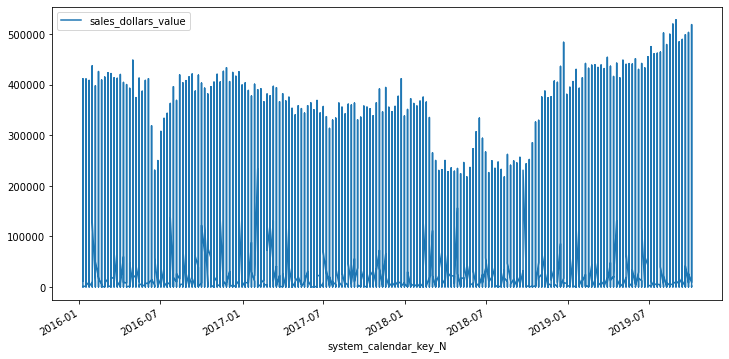

In [91]:
data_a_c = data_merge_sales_mnf[(data_merge_sales_mnf['Vendor'] == 'A') & (data_merge_sales_mnf['CLAIM_ID_x'] == 40)]
ax = data_a_c.plot(x='system_calendar_key_N', y='sales_dollars_value', figsize=(12,6))

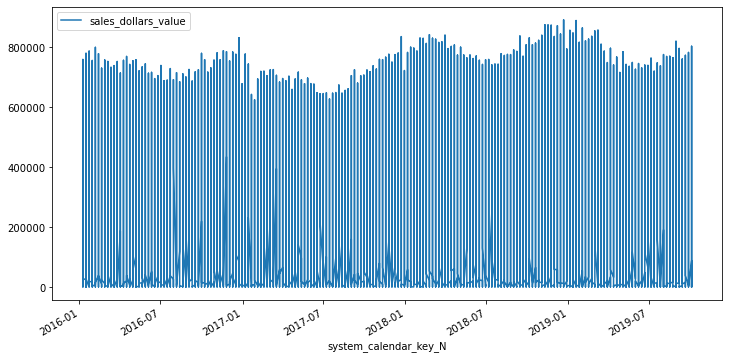

In [92]:
data_a_c = data_merge_sales_mnf[(data_merge_sales_mnf['Vendor'] == 'A') & (data_merge_sales_mnf['CLAIM_ID_x'] == 32)]
ax = data_a_c.plot(x='system_calendar_key_N', y='sales_dollars_value', figsize=(12,6))

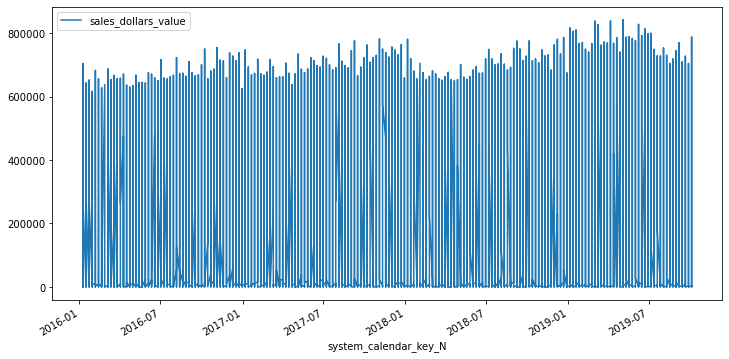

In [93]:
data_a_c = data_merge_sales_mnf[(data_merge_sales_mnf['Vendor'] == 'A') & (data_merge_sales_mnf['CLAIM_ID_x'] == 227)]
ax = data_a_c.plot(x='system_calendar_key_N', y='sales_dollars_value', figsize=(12,6))

# ●	Identify top 5 themes with the highest business opportunity (this Is subjective. Back up your top 5 with valid reasoning)

For our client top 5 themes are the 227, 32, 40, 0, 8 because this are making more sales than other

1. CLAIM ID 227 is making constant sales 
2. CLAIM ID 32 is growing year by year 
3. CLAIM ID 40 is showing incline plane from 2019
4. CLAIM TD 8 is making sales in a constant manner without ups and downs 
5. CLAIM ID 0 this is making more sales than other.